In [36]:
import torch
from PIL import Image

from pipeline.clip_wrapper import ClipWrapper
from pipeline.process_videos import DATAFRAME_PATH
from pipeline.download_videos import REPO_ROOT
import pandas as pd

clip_wrapper = ClipWrapper()
df = pd.read_parquet(DATAFRAME_PATH)
vectors = torch.from_numpy(df.iloc[:, 4:].to_numpy()).float()

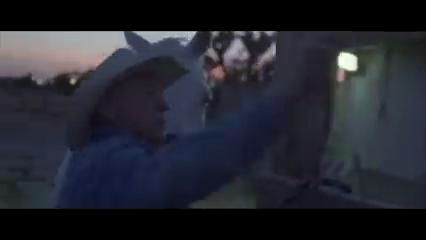

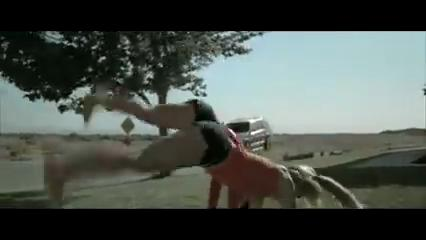

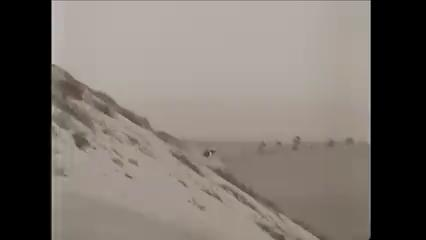

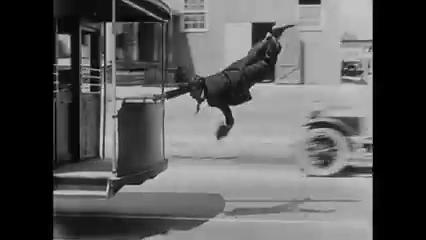

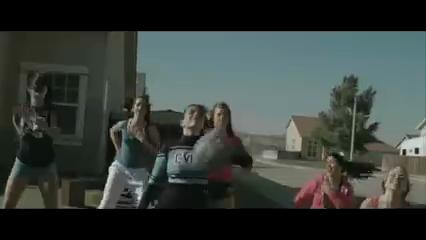

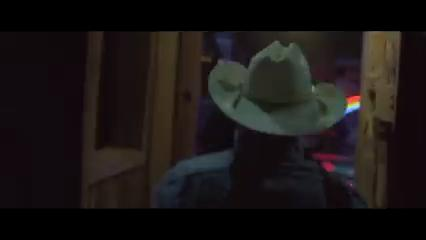

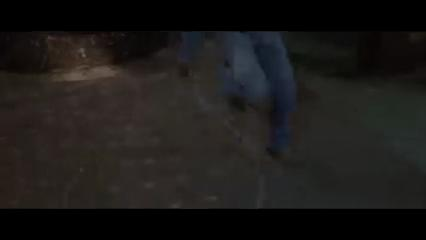

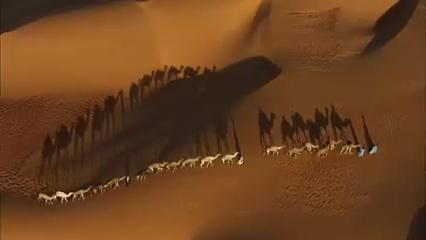

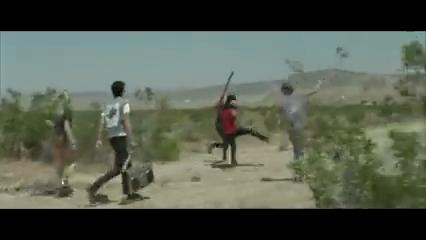

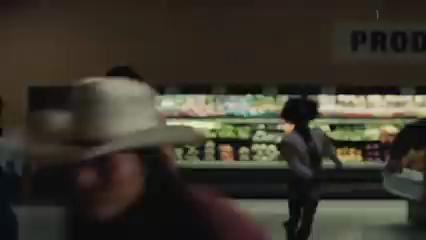

In [37]:
query = "Man on a horse"
vector = clip_wrapper.texts2vec([query]).detach()
NUM_SIMILAR = 10
most_similar_frames = torch.cosine_similarity(vectors, vector).topk(NUM_SIMILAR)
for frame_idx in most_similar_frames.indices:
    image_path = REPO_ROOT / df.iloc[int(frame_idx), 3]
    img = Image.open(image_path)
    display(img)